In [1]:
from N_Gram import N_Gram
import numpy as np
import csv
import random
from Linear_Regression import model

In [2]:
with open('../data/train.tsv') as train_file:
    reader = csv.reader(train_file , delimiter='\t')
    data = list(reader)
data = data[1:] # 有表头

data_feature = N_Gram(data , dimension=4)
data_feature.create_dict()

create gram dict : 4-gram: 100%|██████████| 156060/156060 [00:00<00:00, 409619.07it/s]


#### 取样部分数据(平均取样)

In [3]:
nd_data = np.array(data)
rad_idx = random.sample(list(range(6000)) , 1000)

senti_0 = nd_data[nd_data[:,3] == '0']
sample_0 = senti_0[rad_idx]

senti_1 = nd_data[nd_data[:,3] == '1']
sample_1 = senti_1[rad_idx]

senti_2 = nd_data[nd_data[:,3] == '2']
sample_2 = senti_2[rad_idx]

senti_3 = nd_data[nd_data[:,3] == '3']
sample_3 = senti_3[rad_idx]

senti_4 = nd_data[nd_data[:,3] == '4']
sample_4 = senti_4[rad_idx]

sample = np.concatenate((sample_0,sample_1,sample_2,sample_3,sample_4), axis=0)
len(sample)

5000

#### 取样部分数据(随机取样)

In [4]:
# sample = random.sample(data , 5000)

In [5]:
eva_data = sample

eva_feature = N_Gram(eva_data , dimension=4)
eva_feature.word_dict = data_feature.word_dict
eva_feature.dict_len = data_feature.dict_len
eva_phrase = [item[2] for item in eva_data]

#### 读取模型

In [6]:
classifier = model(5 , data_feature.dict_len)
tmp_list = []
model_name = '2023-03-12 10_38-model'


with open('../model/'+model_name+'.tsv' , 'r') as trained_model:
    for line in trained_model:
        tmp_list.append(line.strip().split('\t'))
classifier.W_matrix = np.array(tmp_list, dtype=np.float64)

classifier.W_matrix.shape

(360247, 5)

#### 开始生成预测结果

In [7]:
result = []

for phrase in eva_phrase:
    tmp_feature = np.zeros((1,eva_feature.dict_len),dtype=np.float64)
    #获取一行的特征表示
    for dime in range(1,5):
        words = phrase.lower().split()
        for j in range(len(words)-dime+1):
            tokenized_word = ' '.join(words[j : j+dime])
            if tokenized_word in eva_feature.word_dict:
                tmp_feature[0][eva_feature.word_dict[tokenized_word]] = 1
    #开始计算预测
    result.append(classifier.prediction(tmp_feature))

In [8]:
# eva_feature.y_data # 是list

In [9]:
len(result) == len(eva_feature.y_data)

True

#### 开始对比验证看看

In [10]:
a = 0
for i in range(len(result)):
    if result[i] == eva_feature.y_data[i]:
        a += 1

a / len(result)

0.1992

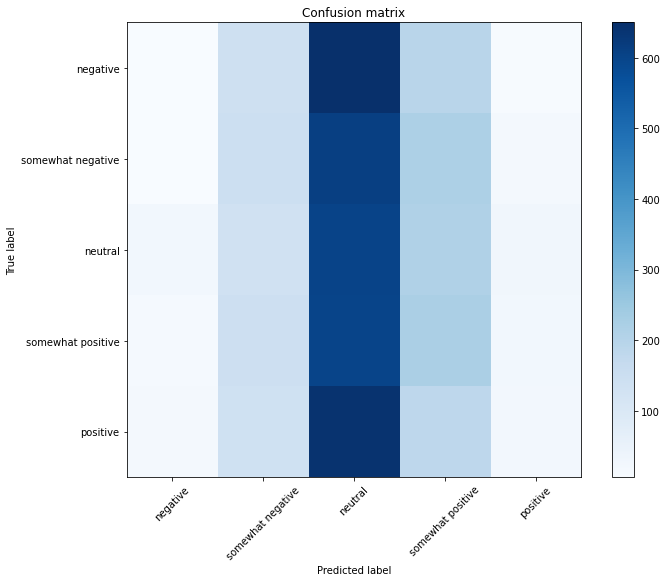

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(eva_feature.y_data, result)
classes = ['negative','somewhat negative','neutral','somewhat positive','positive']

# 绘制混淆矩阵
plt.figure(figsize=(10,8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()